In [1]:
import pandas as pd

In [2]:
# load pre-processed dataset
df = pd.read_csv('/Users/rumethsandinu/Study/Assessments/Year 2/DSGP/Datasets/pre_processed_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25568 entries, 0 to 25567
Columns: 185 entries, Quantity Sold (kilo) to Category Name_Solanum
dtypes: bool(183), float64(2)
memory usage: 4.9 MB


In [3]:
df.sample(3)

,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Item Name_7 Colour Pepper,Item Name_Agaricus Bisporus,Item Name_Aihao,Item Name_Amaranth,Item Name_Amaranth,Item Name_Apricot Bao Mushroom,Item Name_Basil,Item Name_Bell Pepper,...,Item Name_Zhijiang Red Bolt,Item Name_Zhimaxiancai,Item Name_Zhuyecai,Item Name_Zhuyecai,Category Name_Aquatic Tuberous Vegetables,Category Name_Cabbage,Category Name_Capsicum,Category Name_Edible Mushroom,Category Name_Flower/Leaf Vegetables,Category Name_Solanum
12636,0.622222,4.000000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
19633,1.000000,5.900000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
22553,0.233333,5.833333,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [4]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

/Users/rumethsandinu/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [5]:
# define dependent and non dependent variables
y = df['Quantity Sold (kilo)']
x = df.drop(columns=['Quantity Sold (kilo)'], axis=1)

# split the dataset 0.8, 0.1, 0.1
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_eval, x_test, y_eval, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# convert to tensor arrays
x_train_tensor = tf.constant(x_train, dtype=tf.float32)
y_train_tensor = tf.constant(y_train, dtype=tf.float32)
x_eval_tensor = tf.constant(x_eval, dtype=tf.float32)
y_eval_tensor = tf.constant(y_eval, dtype=tf.float32)

x_train_tensor.shape, x_eval_tensor.shape, x_test.shape

2023-12-09 14:45:03.635968: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2023-12-09 14:45:03.635986: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-12-09 14:45:03.635991: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-12-09 14:45:03.636016: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-09 14:45:03.636028: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(TensorShape([20454, 184]), TensorShape([2557, 184]), (2557, 184))

In [6]:
# save testing dataset
df_test = pd.concat([y_test.reset_index(drop=True), x_test.reset_index(drop=True)], axis=1)
df_test.to_csv('/Users/rumethsandinu/Study/Assessments/Year 2/DSGP/Datasets/testing_dataset.csv')
df_test.sample(5)

,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Item Name_7 Colour Pepper,Item Name_Agaricus Bisporus,Item Name_Aihao,Item Name_Amaranth,Item Name_Amaranth,Item Name_Apricot Bao Mushroom,Item Name_Basil,Item Name_Bell Pepper,...,Item Name_Zhijiang Red Bolt,Item Name_Zhimaxiancai,Item Name_Zhuyecai,Item Name_Zhuyecai,Category Name_Aquatic Tuberous Vegetables,Category Name_Cabbage,Category Name_Capsicum,Category Name_Edible Mushroom,Category Name_Flower/Leaf Vegetables,Category Name_Solanum
1952,1.000000,4.9,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2384,0.700000,10.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
171,0.283333,6.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1050,0.450000,6.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1537,0.460000,9.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [7]:
# convert to tensor arrays
x_test_tensor = tf.constant(x_test, dtype=tf.float32)
y_test_tensor = tf.constant(y_test, dtype=tf.float32)

In [8]:
# model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(184, activation='relu', input_shape=(x_train_tensor.shape[1],)))
model.add(tf.keras.layers.Reshape((1, 184))) 
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.LSTM(32))
model.add(tf.keras.layers.Dense(1, activation='linear'))

# compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='mae', metrics=['mae'])

epoch_number = 20

# train model and get history
history = model.fit(x_train_tensor, y_train_tensor, epochs=epoch_number, validation_data=(x_eval_tensor, y_eval_tensor))

Epoch 1/20


2023-12-09 14:45:05.287477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2023-12-09 14:45:05.380010: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


640/640 [==============================] - 12s 16ms/step - loss: 0.1966 - mae: 0.1966 - val_loss: 0.1129 - val_mae: 0.1129
Epoch 2/20
640/640 [==============================] - 10s 16ms/step - loss: 0.0834 - mae: 0.0834 - val_loss: 0.0760 - val_mae: 0.0760
Epoch 3/20
640/640 [==============================] - 11s 16ms/step - loss: 0.0690 - mae: 0.0690 - val_loss: 0.0710 - val_mae: 0.0710
Epoch 4/20
640/640 [==============================] - 10s 15ms/step - loss: 0.0667 - mae: 0.0667 - val_loss: 0.0695 - val_mae: 0.0695
Epoch 5/20
640/640 [==============================] - 9s 15ms/step - loss: 0.0649 - mae: 0.0649 - val_loss: 0.0676 - val_mae: 0.0676
Epoch 6/20
640/640 [==============================] - 9s 15ms/step - loss: 0.0637 - mae: 0.0637 - val_loss: 0.0672 - val_mae: 0.0672
Epoch 7/20
640/640 [==============================] - 9s 14ms/step - loss: 0.0624 - mae: 0.0624 - val_loss: 0.0662 - val_mae: 0.0662
Epoch 8/20
640/640 [==============================] - 9s 15ms/step - loss: 0

In [9]:
# predict sample value set
y_predictions = model.predict(x_test_tensor)
y_predictions[:5]

80/80 [==============================] - 1s 6ms/step


array([[0.22187608],
       [0.99469644],
       [0.5362616 ],
       [0.20734902],
       [0.4288017 ]], dtype=float32)

In [10]:
# view actual values
y_test_tensor[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.26666668, 1.        , 0.59      , 0.18333334, 0.36666667],
      dtype=float32)>

In [11]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'loss')

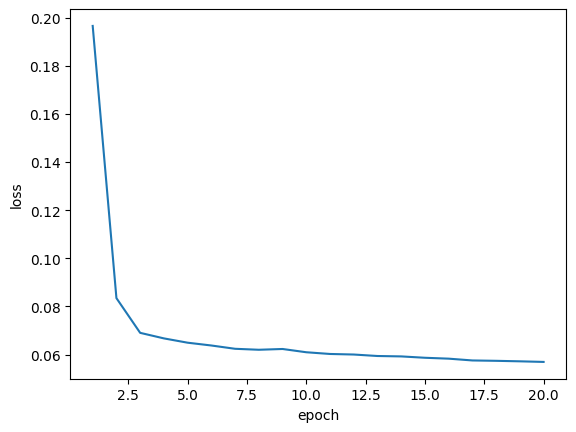

In [12]:
# plot loss with respect to epoch number
x_range = range(1, epoch_number + 1)
loss = history.history['loss']
plt.plot(x_range, loss)
plt.xlabel('epoch')
plt.ylabel('loss')

In [13]:
# final model with optimized epoch number
final_model = tf.keras.Sequential()
final_model.add(tf.keras.layers.Dense(184, activation='relu', input_shape=(x_train_tensor.shape[1],)))
final_model.add(tf.keras.layers.Reshape((1, 184))) 
final_model.add(tf.keras.layers.LSTM(128, return_sequences=True))
final_model.add(tf.keras.layers.Dense(128, activation='relu'))
final_model.add(tf.keras.layers.Dense(64, activation='relu'))
final_model.add(tf.keras.layers.LSTM(32))
final_model.add(tf.keras.layers.Dense(1, activation='linear'))

final_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='mae', metrics=['mae'])

epoch_number = 19

history = final_model.fit(x_train_tensor, y_train_tensor, epochs=epoch_number, validation_data=(x_eval_tensor, y_eval_tensor))

Epoch 1/19


2023-12-09 14:49:20.287706: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


640/640 [==============================] - 12s 16ms/step - loss: 0.2091 - mae: 0.2091 - val_loss: 0.1398 - val_mae: 0.1398
Epoch 2/19
640/640 [==============================] - 10s 15ms/step - loss: 0.0928 - mae: 0.0928 - val_loss: 0.0869 - val_mae: 0.0869
Epoch 3/19
640/640 [==============================] - 9s 15ms/step - loss: 0.0711 - mae: 0.0711 - val_loss: 0.0759 - val_mae: 0.0759
Epoch 4/19
640/640 [==============================] - 9s 15ms/step - loss: 0.0665 - mae: 0.0665 - val_loss: 0.0735 - val_mae: 0.0735
Epoch 5/19
640/640 [==============================] - 9s 14ms/step - loss: 0.0652 - mae: 0.0652 - val_loss: 0.0704 - val_mae: 0.0704
Epoch 6/19
640/640 [==============================] - 9s 15ms/step - loss: 0.0634 - mae: 0.0634 - val_loss: 0.0687 - val_mae: 0.0687
Epoch 7/19
640/640 [==============================] - 10s 15ms/step - loss: 0.0631 - mae: 0.0631 - val_loss: 0.0669 - val_mae: 0.0669
Epoch 8/19
640/640 [==============================] - 10s 15ms/step - loss: 0

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 184)               34040     
                                                                 
 reshape (Reshape)           (None, 1, 184)            0         
                                                                 
 lstm (LSTM)                 (None, 1, 128)            160256    
                                                                 
 dense_1 (Dense)             (None, 1, 128)            16512     
                                                                 
 dense_2 (Dense)             (None, 1, 64)             8256      
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [15]:
# view loss for testing values
final_model.evaluate(x_test_tensor, y_test_tensor)

80/80 [==============================] - 1s 7ms/step - loss: 0.0599 - mae: 0.0599


[0.05992291867733002, 0.05992291867733002]

In [16]:
# predict sample value set
y_predictions = model.predict(x_test_tensor)
y_predictions[:5]

80/80 [==============================] - 1s 6ms/step


array([[0.22187608],
       [0.99469644],
       [0.5362616 ],
       [0.20734902],
       [0.4288017 ]], dtype=float32)

In [17]:
# view actual values
y_test_tensor[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.26666668, 1.        , 0.59      , 0.18333334, 0.36666667],
      dtype=float32)>

In [18]:
# save final model
final_model.save('final_sold_amount_model')

INFO:tensorflow:Assets written to: final_sold_amount_model/assets


INFO:tensorflow:Assets written to: final_sold_amount_model/assets
